# PREDICTION  HOUSE SALES IN KING COUNTRY, USA

In [1]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')

---

## Read the Dataset

In [2]:
# Read the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# See the general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Check for duplicated rows
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


As we can see that our dataset has 21 columns, 21613 rows with various datatype, had no missing value and no duplicated rows. So then we will drop the `id` and `date` variable  

source : 
- https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html
- https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

---

## Data Cleaning

In this step, we will process of drop the unimportant variable and incorrectly formatted data within a dataset. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making

In [5]:
# Drop variables id & date
df = df.drop(['id','date'], axis = 1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


After that, we will round all the decimal variable (corrected) to the integer (*exclude `lat` & `long` variables*)

In [6]:
# Define df_1
df_1 = (df.loc[:, ~df.columns.isin(['lat', 'long'])]).round(0).astype(int)
df_1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


---

## Exploratory Data Analysis

Exploratory data analysis is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. So we do the Exploratory Data Analysis (EDA) to our data for better understanding

First, we will see the distribution each variable of our dataset

### Graph each variable's distribution

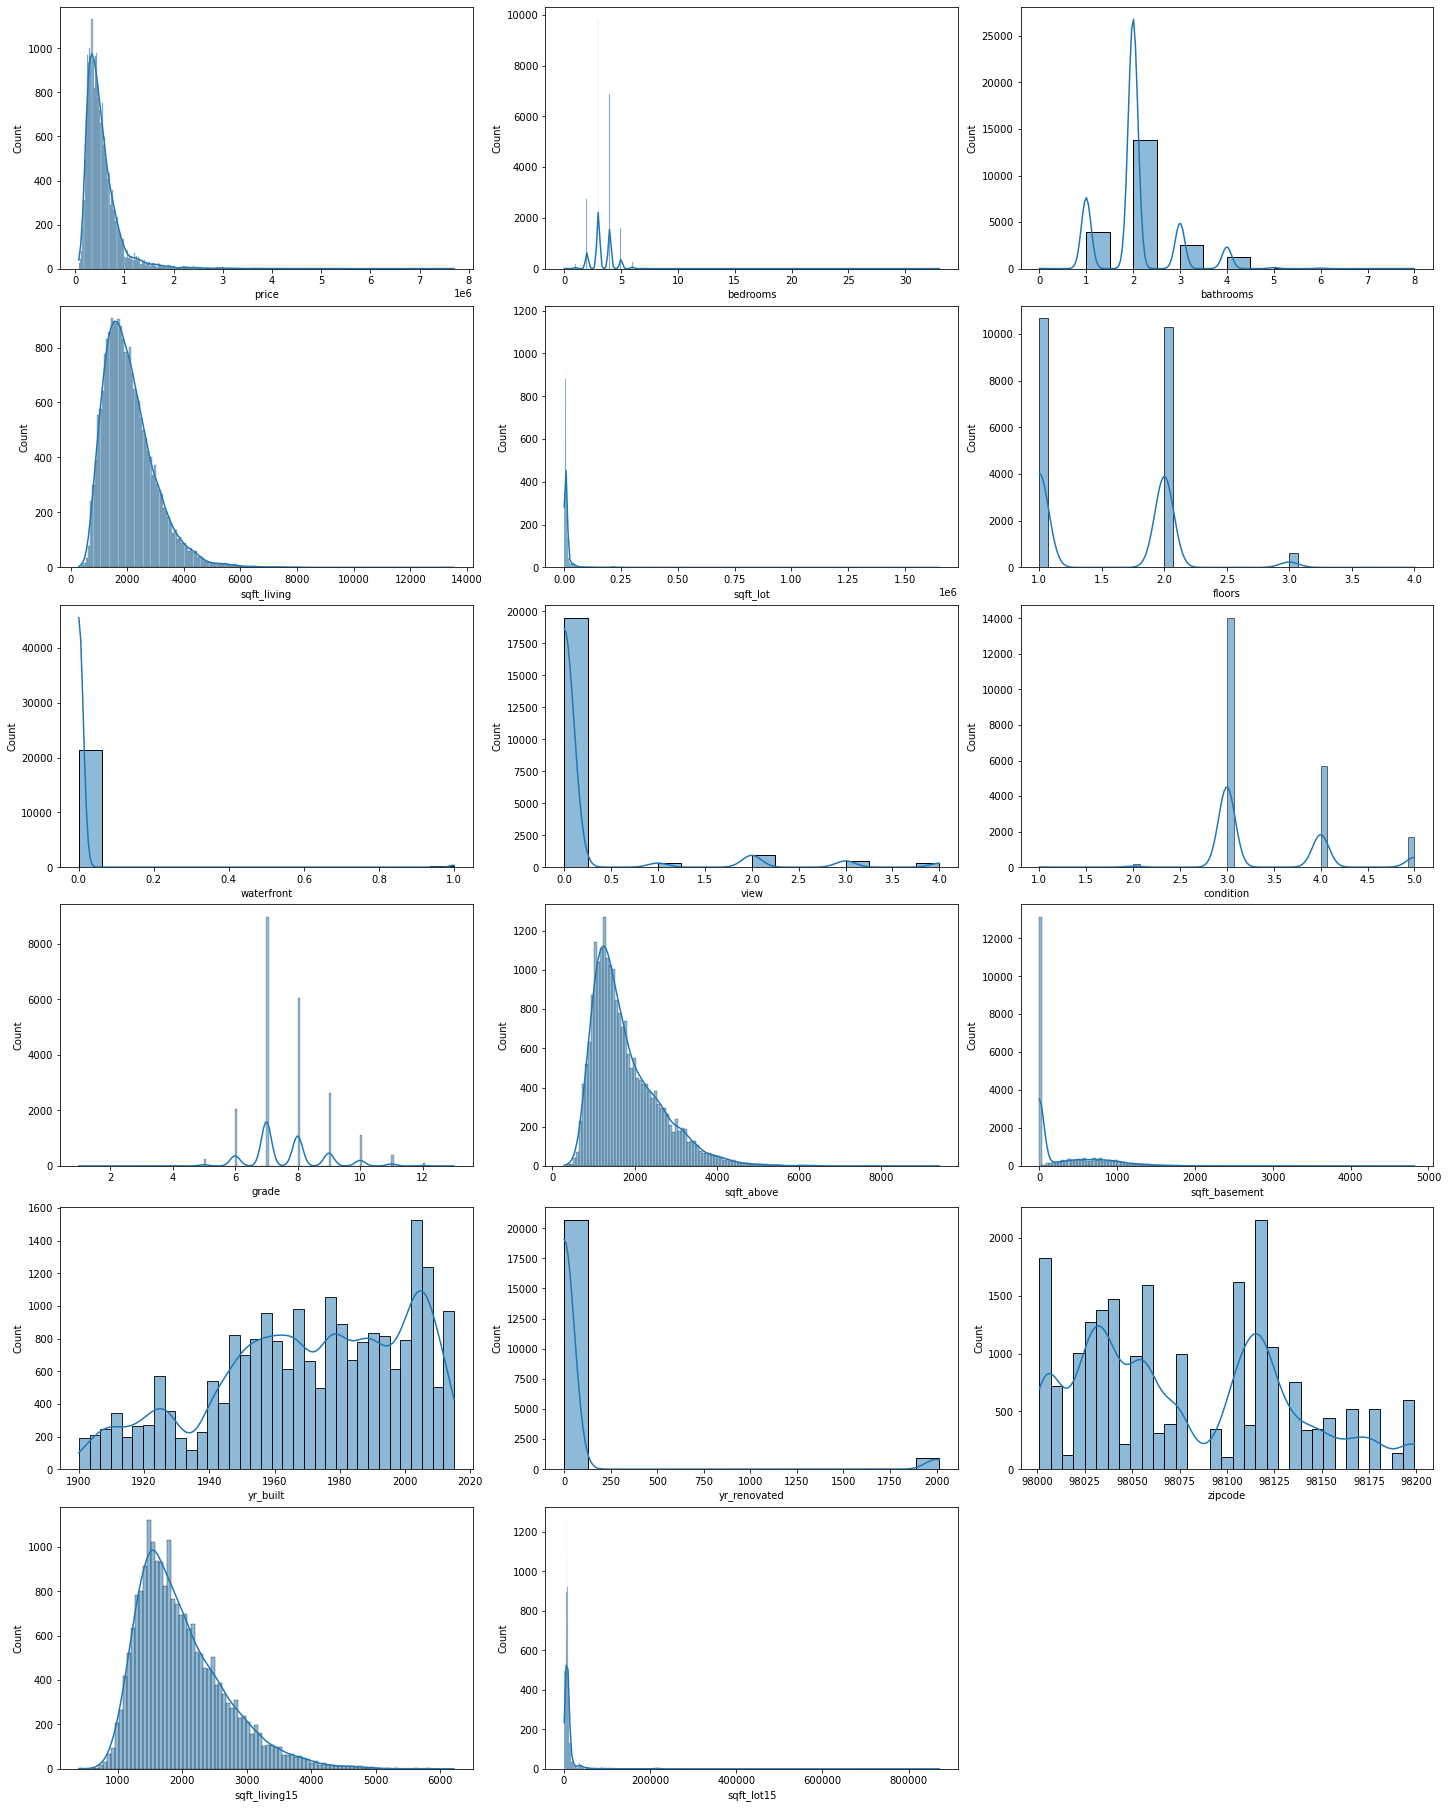

In [7]:
# Graph each variable's distribution
fig = plt.figure(figsize=(20, 25), constrained_layout=True)
for i in range(len(df_1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(data=df_1, x=df_1[df_1.columns[i]], kde=True)

**Key Points :**  
- The `price` of house in King Country mostly in range < USD 2000000  
- Most of house in King Country have 1 - 5 `bedrooms`
- Most of house in King Country have 2 `bathrooms`  
- The `sqft_living` of house in King Country mostly in range 0 - 6000
- The `sqft_lot` of house in King Country mostly in range < 250000
- Most of house in King Country have 1 - 2 `floors`
- Most of house in King Country not have a `waterfront`
- Most of house in King Country have zero score of `view`
- Most of house in King Country in a good `condition`
- Most of house in King Country have a `grade` on 5 - 12
- Like sqft_living, most of house King Country have `sqft_above` in range 0 - 6000
- Most of house in King Country not have a `sqft_basement`
- Based on `yr_built`, the peak of house construction in King Country is on 1940 - 2020
- Based on `yr_renovated`, Most of house in King Country doesn't get renovated
- The `zipcode` of house in King Country is on number 98000 - 98200
- The `sqft_living15` of house in King Country mostly in range 1000 - 5000
- The `sqft_lot15` of house in King Country mostly in range < 200000

### Correlationg features with target

The target of this dataset is `price`, so we will correlated this target to all features

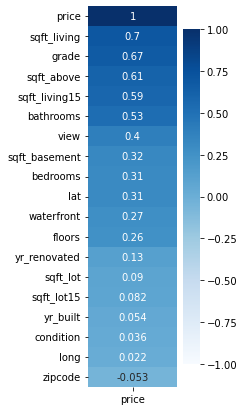

In [8]:
# Correlating features with target
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

As we can see, `price` variable has a strong correlation with `sqft_living`, `grade`, `sqft_above`, `sqft_living15`, and `bathrooms`

### Pairplot variable target with strong-correlation-variables-target-with

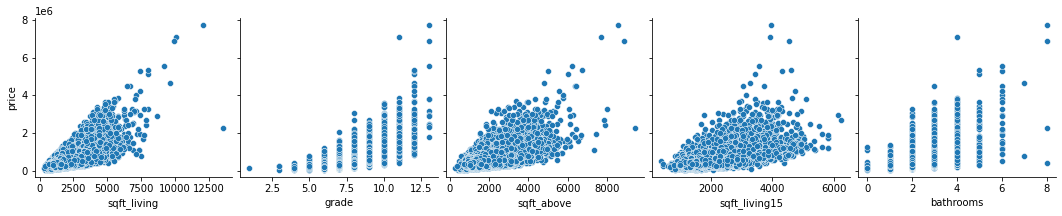

In [9]:
# Pairplot variable target with strong correlation variables target -with
sns.pairplot(df_1, x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], y_vars=['price'], height=3, aspect=1)

Based on the pairplot above, we can see that :  
- (likely) more large sqft_living, the house is more pricey
- (likely) more high grade, the house is more pricey
- (likely) more large sqft_above, the house is more pricey
- (likely) more large sqft_living15, the house is more pricey

### Graph each small amount variable with response

In [10]:
# Describe the small amount variable
sav = df_1[(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'])]

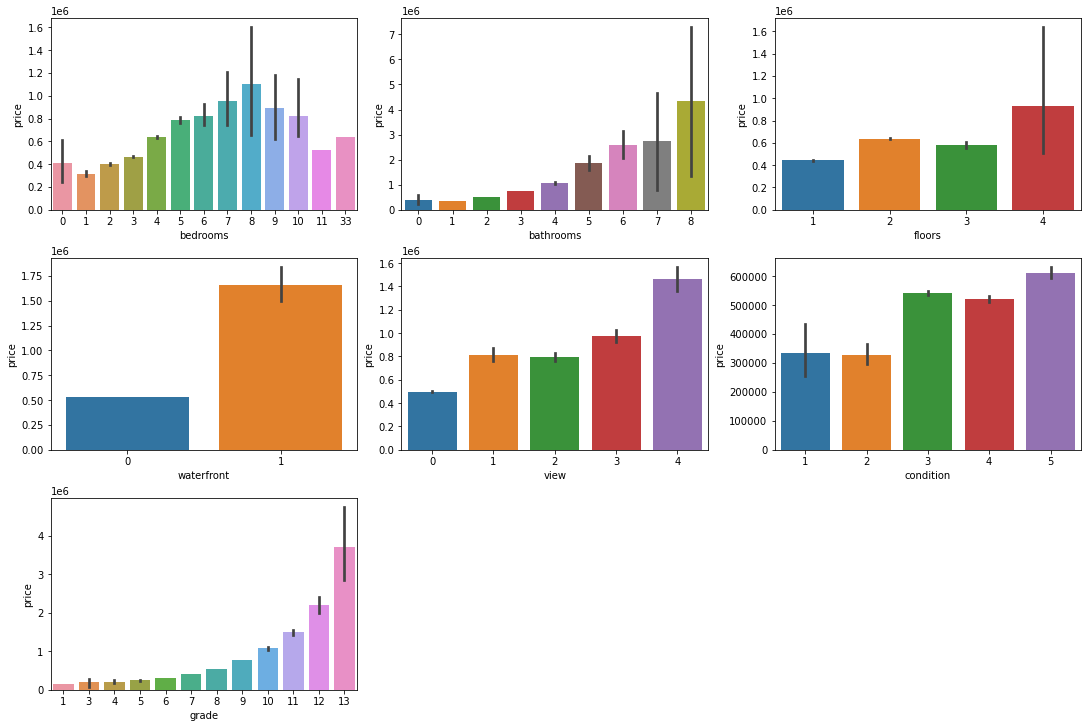

In [11]:
# Graph each small amount variable with response
fig = plt.figure(figsize=(15,10), constrained_layout=True)
for i in range(len(sav.columns)):
    plt.subplot(3, 3, i+1)
    sns.barplot(data=sav, x=sav[sav.columns[i]], y=df_1['price'])

**Key Points :**
- The more `bathrooms` house had, the more pricey that house
- The more `floors` house had, the more pricey that house
- `waterfront` makes the house more pricey
- The more `view` house had, the more pricey that house
- The more good `condition` house had, the more pricey that house
- The more `grade` house had, the more pricey that house

---

## Preprocessing

In this step we will process the dataset to see the outlier and getting the data transformation so we can go any further in the next step

### Outlier detection

<AxesSubplot:>

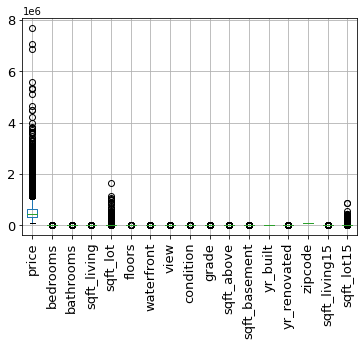

In [12]:
# Outlier detection
df_1.boxplot(grid=True, rot=90, fontsize=13)

As we can see, that there is an outlier on three variables (`price`, `sqft_lot` & `sqft_lot15`). But most of the outliers are near each other so we assume that this value of outliers is true (contains a good information) and we will keep all the data

### Data transformation

at first, we will split the variable price from other variables

In [13]:
# Drop the target variable
df_1.drop(['price'], axis=1, inplace=True)

In [14]:
df_1.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [15]:
# insert `lat` & `long` variables to df_1
lat = df['lat']
long = df['long']
df_1['lat'] = lat
df_1['long'] = long

In [16]:
# Previewed clean data
df_1.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,47.5112,-122.257
1,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,47.7210,-122.319
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,47.7379,-122.233
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,47.5208,-122.393
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,47.6168,-122.045


---

## Modeling

In [17]:
# Import module
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score
from scipy.stats import pearsonr

# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model

# XGBoost
import xgboost

In [18]:
# Data Splitting
X = df_1.values
y = df.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=2022)

### Linear Regression

In [19]:
# Train a simple linear regression model
lm = linear_model.LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
# Describe y_predicted
y_predicted=lm.predict(X_test)
y_predicted

array([ 441789.64192401,  176483.15587769,  552072.25514344, ...,
        485992.07560727, 1716342.61920378,  821853.95589027])

In [22]:
lm.score(X_test,y_test)

0.7062443844613606

### XGBoost

In [23]:
# Train sxgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [24]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [25]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.861996627700701


### Show Test Prices vs Predicted Prices

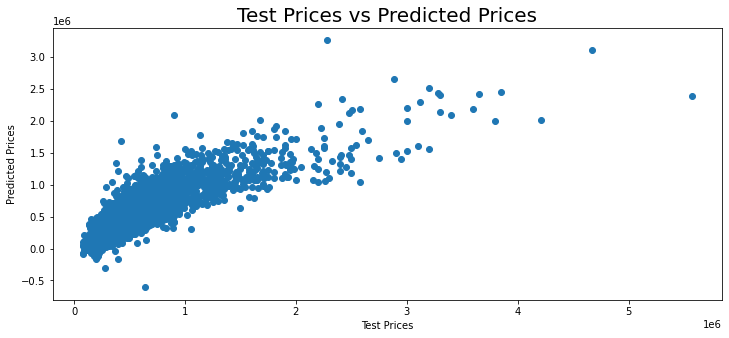

In [26]:
plt.figure(figsize=(12,5))
plt.scatter(x=y_test, y=y_predicted)
plt.xlabel("Test Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Prices vs Predicted Prices", size=20)
plt.show()

### Feature Importances

In [71]:
xgb.feature_importances_

array([0.00302371, 0.00417268, 0.1802934 , 0.00688145, 0.00478461,
       0.0988211 , 0.03602384, 0.00691884, 0.45069456, 0.02139369,
       0.00604957, 0.02217523, 0.0068976 , 0.01565308, 0.02236574,
       0.0086388 , 0.06369729, 0.04151485], dtype=float32)

In [82]:
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'lat', 'long']
np.array(variables)

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'lat', 'long'], dtype='<U13')

In [89]:
feature_importances = pd.DataFrame({'variables': ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'lat', 'long'],
                   'score': [0.00302371, 0.00417268, 0.1802934 , 0.00688145, 0.00478461,
       0.0988211 , 0.03602384, 0.00691884, 0.45069456, 0.02139369,
       0.00604957, 0.02217523, 0.0068976 , 0.01565308, 0.02236574,
       0.0086388 , 0.06369729, 0.04151485]})

In [90]:
feature_importances

,variables,score
0,bedrooms,0.003024
1,bathrooms,0.004173
2,sqft_living,0.180293
3,sqft_lot,0.006881
4,floors,0.004785
5,waterfront,0.098821
6,view,0.036024
7,condition,0.006919
8,grade,0.450695
9,sqft_above,0.021394


In [95]:
fn = feature_importances.sort_values(by='score', ascending=False)

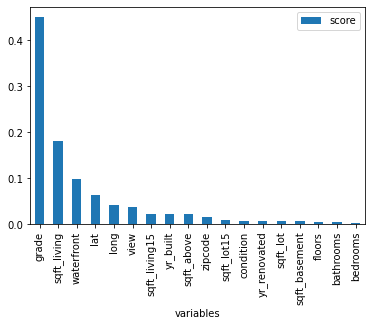

In [103]:
ax = fn.plot.bar(x='variables', y='score')

As we can see, that `grade`, `sqft_living`, `waterfront`, `lat` and `long` variables are the top importances variable that influence our modeling